## Credit Card Fraud Detection @md mojahid

In [1]:
import os # accessing directory structure
import pandas as pd

In [2]:
for dirname, _, filenames in os.walk('creditcard.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('creditcard.csv', delimiter=',')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Determining Percentage of fradulaent Transactions
df[df.Class==1].Class.sum()/df.Class.count()*100

0.1727485630620034

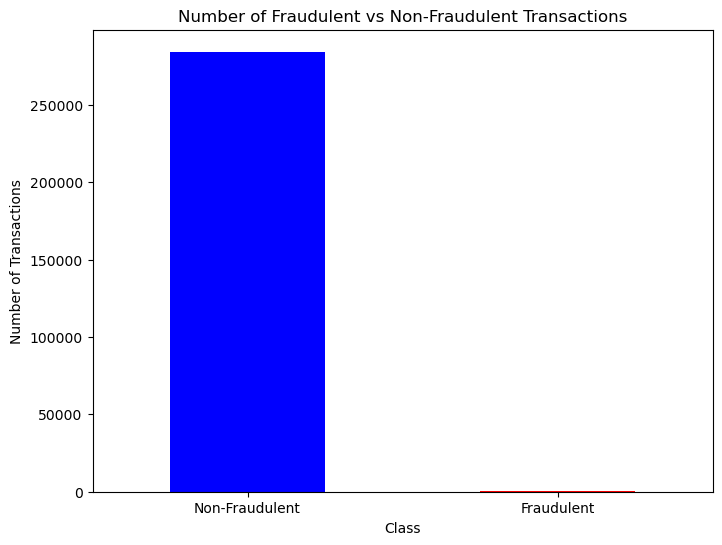

Fraudulent Transactions:
Count: 492
Percentage: 0.17%

Non-Fraudulent Transactions:
Count: 284315
Percentage: 99.83%


In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
# Count the number of fraudulent and non-fraudulent transactions
fraud_counts = df['Class'].value_counts()

# Calculate the percentage of fraudulent and non-fraudulent transactions
fraud_percentage = fraud_counts / len(df) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()

# Print the counts and percentages
print("Fraudulent Transactions:")
print(f"Count: {fraud_counts[1]}")
print(f"Percentage: {fraud_percentage[1]:.2f}%")

print("\nNon-Fraudulent Transactions:")
print(f"Count: {fraud_counts[0]}")
print(f"Percentage: {fraud_percentage[0]:.2f}%")

## Thus, it can be seen that only 0.173% of the transactions are actually fradulent.

<AxesSubplot:xlabel='Class', ylabel='Amount'>

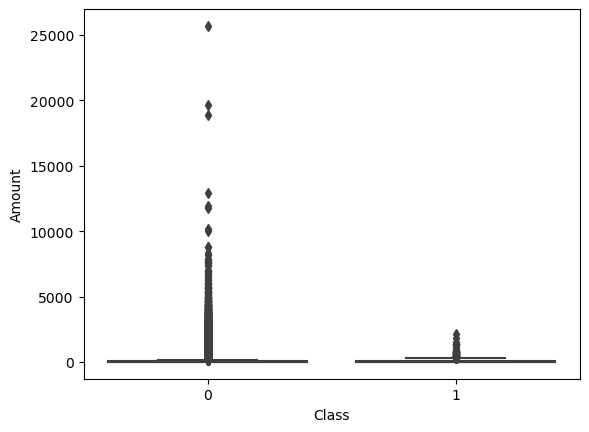

In [10]:
sns.boxplot(x="Class",y="Amount", data= df)

<AxesSubplot:xlabel='Amount', ylabel='Count'>

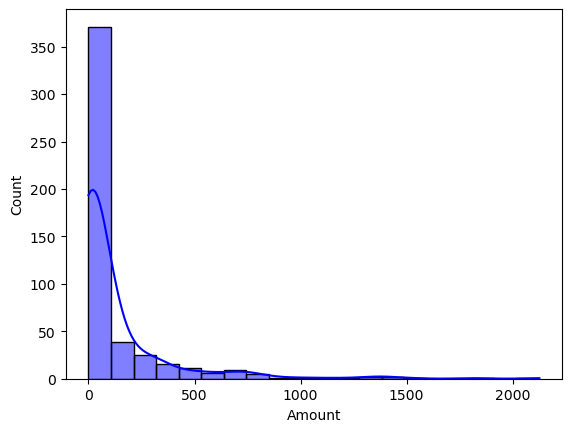

In [11]:
sns.histplot(df[df.Class==1].Amount,bins=20,kde=True, color='blue')

<AxesSubplot:xlabel='Amount', ylabel='Count'>

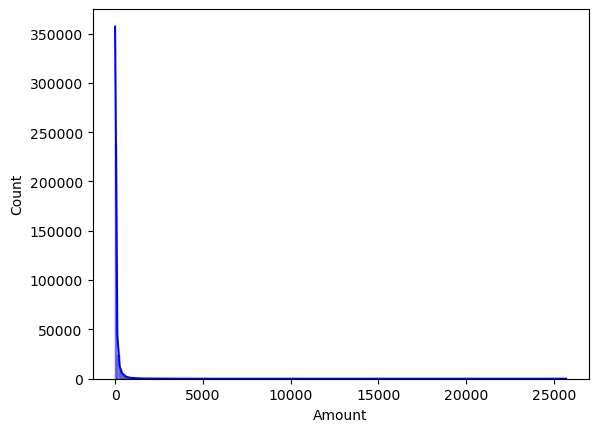

In [12]:
sns.histplot(df[df.Class==0].Amount,bins=200,kde=True, color='blue')

<AxesSubplot:xlabel='Time', ylabel='Class'>

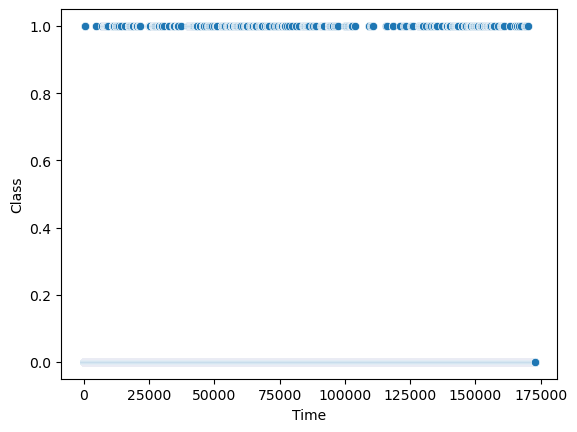

In [13]:
# Creating a scatter plot to observe the distribution of classes with time
sns.scatterplot(y="Class",x="Time", data=df)

<AxesSubplot:xlabel='Amount', ylabel='Class'>

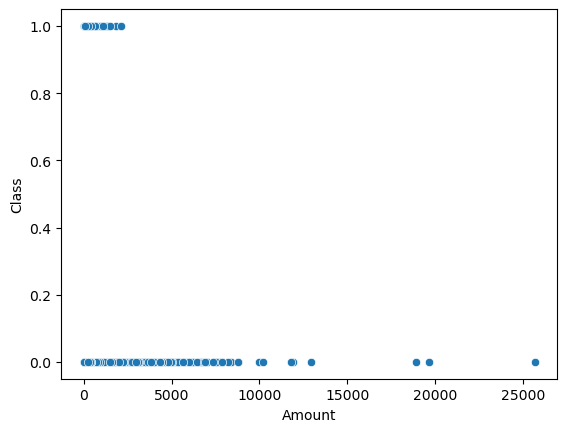

In [14]:
# Creating a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x="Amount",y="Class",data=df)

Fraudulent transactions are actually low value transactions

## Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [16]:
# Split the data into training and testing sets
X=df.copy()
y=X.pop('Class')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [17]:
y_train.sum()/y_train.count()

0.001729245759178389

In [18]:
y_test.sum()/y_test.count()

0.0017204452090867595

In [19]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=50)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=50)

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[56858     6]
 [   35    63]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.64      0.75        98

    accuracy                           1.00     56962
   macro avg       0.96      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
# Calculate the metrics
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results=pd.DataFrame(columns=['Iteration','Accuracy', 'Precision', 'Recall', 'F1-Score'])
# Create a DataFrame
results=results._append({'Iteration':'No_Sampling','Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1-Score':f1}, ignore_index=True)

# Display the result DataFrame
print(results)

     Iteration  Accuracy  Precision    Recall  F1-Score
0  No_Sampling   0.99928   0.913043  0.642857  0.754491


## Using KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters and values to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Different values of k
    #'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=2, n_jobs=-1, scoring='recall', verbose=1)

# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
best_model 

In [ ]:
# Train the KNN classifier
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test mset
y_pred = best_model.predict(X_test_scaled)

In [ ]:
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Append the results as a row to the DataFrame
results_mod = results_mod._append({'Model': 'KNN', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)

# Display the result DataFrame
print(results_mod)

## Using Random Forest Classifier


In [ ]:
y_train_resampled.count()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for hyperparameter tuning
params_grid = {
    'n_estimators': [5,10,20],
    'max_depth': [2,3,5,7]
    #'min_samples_split': [1000, 2000, 4000]
    #'min_samples_leaf': [250,500, 1000],
}

# Initialize the Random Forest Classifier model
model = RandomForestClassifier(random_state=50)

# Initialize RandomizedSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=params_grid,n_jobs=-1, scoring='recall', cv=2,verbose=1)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best model
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

In [ ]:
score_df.nlargest(5,"mean_test_score")